<a href="https://colab.research.google.com/github/robertomartinezedu/Curso-IA-BigData/blob/main/PIA_UD2_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - AED y limpieza de valores atípicos.

En esta práctiva, se va a realizar un análisis exporatorio de datos previo para poder observar la naturaleza de los datos del dataset propuesto para análisis.



In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset.csv')
df.head()


,Unnamed: 0,index,age,gender,education,job,experience,salary,country,race
0,0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,2,NaN,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [269]:
df.columns

Index(['Unnamed: 0', 'index', 'age', 'gender', 'education', 'job',
       'experience', 'salary', 'country', 'race'],
      dtype='object')

Los campos con los que cuenta este dataset son los siguientes:

*   ```age```: edad
*   ```gender```: género.
*   ```education```: nivel educativo.
*   ```job```: puesto de trabajo.
*   ```experience```: años de experiencia laboral.
*   ```salary```: salario.
*   ```country```: país de procedencia.
*   ```race```: raza.






Se va a poner la columna index como índice y se procede a borrar la columna Unnamed: 0.

In [270]:
df = df.drop(columns=['Unnamed: 0'])
df = df.set_index('index')

In [271]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         6142 non-null   float64
 1   gender      6702 non-null   object 
 2   education   6701 non-null   object 
 3   job         6702 non-null   object 
 4   experience  6701 non-null   float64
 5   salary      6699 non-null   float64
 6   country     6704 non-null   object 
 7   race        6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.4+ KB
None


In [272]:
print(df.describe())

               age   experience         salary
count  6142.000000  6701.000000    6699.000000
mean     33.616412     8.094687  115326.964771
std       7.689423     6.059003   52786.183911
min      -1.000000     0.000000     350.000000
25%      28.000000     3.000000   70000.000000
50%      32.000000     7.000000  115000.000000
75%      38.000000    12.000000  160000.000000
max      62.000000    34.000000  250000.000000


Parece que hay valores extraños, como edad negativa y salarios muy bajos. Por el momento se van a eliminar los datos de aquellos sujetos que estén por debajo de la edad mínima legal para trabajar.
Por el momento se respetan los valores nulos para tratarlos en el siguiente punto.

In [273]:
df = df[df['age'].ge(18) | df['age'].isnull()]

In [274]:
# Resumen estadístico de las variables numéricas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6700 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         6138 non-null   float64
 1   gender      6698 non-null   object 
 2   education   6697 non-null   object 
 3   job         6698 non-null   object 
 4   experience  6697 non-null   float64
 5   salary      6695 non-null   float64
 6   country     6700 non-null   object 
 7   race        6700 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.1+ KB
None


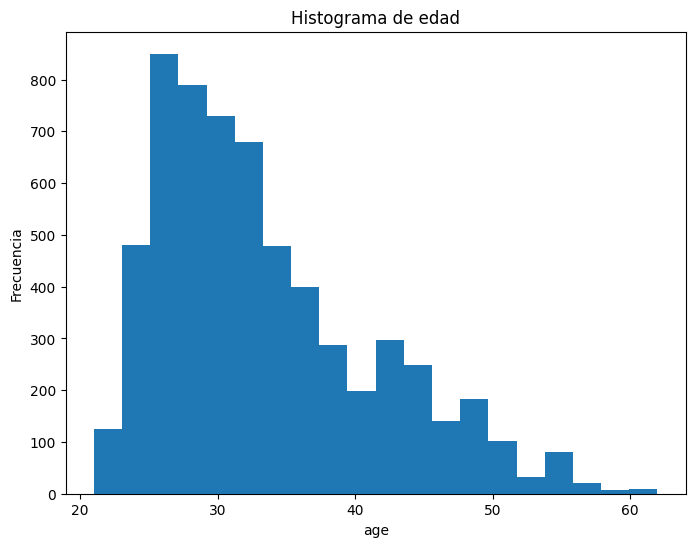

In [275]:
# Histograma de una variable numérica (ejemplo)
# Reemplaza 'variable_numerica' con el nombre de tu columna
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20)
plt.xlabel('age')
plt.ylabel('Frecuencia')
plt.title('Histograma de edad')
plt.show()

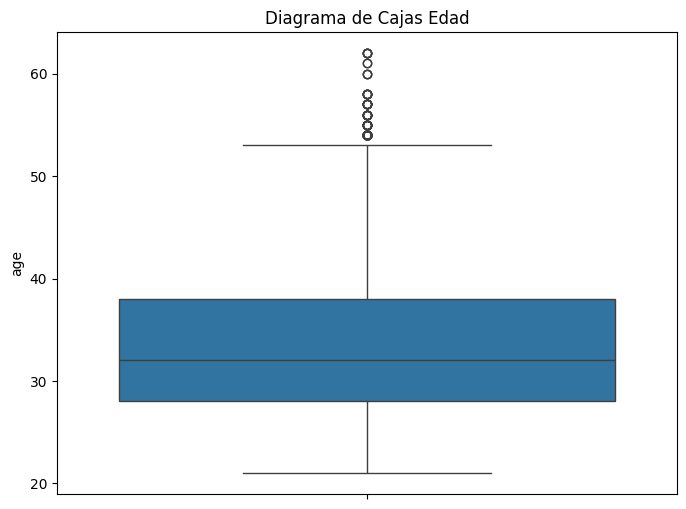

In [276]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['age'])
plt.ylabel('age')
plt.title('Diagrama de Cajas Edad')
plt.show()

Se puede observar que aparecen varios valores atípicos en este diagrama, pero al tratarse de edades por debajo de la edad de jubilación se entiende que son correctos.

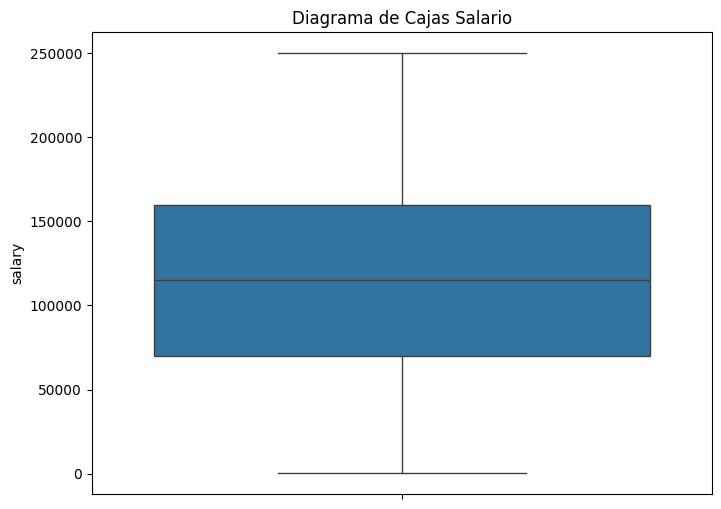

In [277]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['salary'])
plt.ylabel('salary')
plt.title('Diagrama de Cajas Salario')
plt.show()

Como se puede observar, hay un salario mínimo extrañamente bajo. Se van a examinar estos casos.

In [278]:
# prompt: selecciona los valores de salary en df que sean menores de 50000

# Select salary values less than 50000
salaries_less_than_50000 = df[df['salary'] < 10000]

salaries_less_than_50000

,age,gender,education,job,experience,salary,country,race
index,,,,,,,,
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0,USA,Hispanic
1890,25.0,Female,Bachelor's Degree,Front end Developer,1.0,550.0,UK,Mixed
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0,UK,Mixed
4633,31.0,Female,Bachelor's Degree,Junior HR Coordinator,4.0,500.0,USA,Asian


Al tratarse de un salario anual ridículamente bajo se puede entender que son datos erróneos y procedemos a eliminarlos.

In [279]:
df = df[df['salary'] >= 10000]

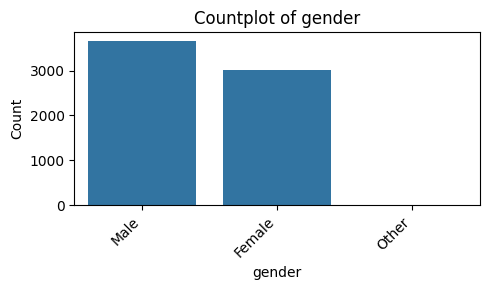

In [280]:
categorical_column = 'gender'
plt.figure(figsize=(5, 3))
sns.countplot(x=categorical_column, data=df)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

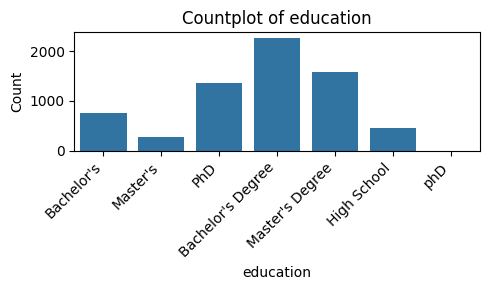

In [281]:
categorical_column = 'education'
plt.figure(figsize=(5, 3))
sns.countplot(x=categorical_column, data=df)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

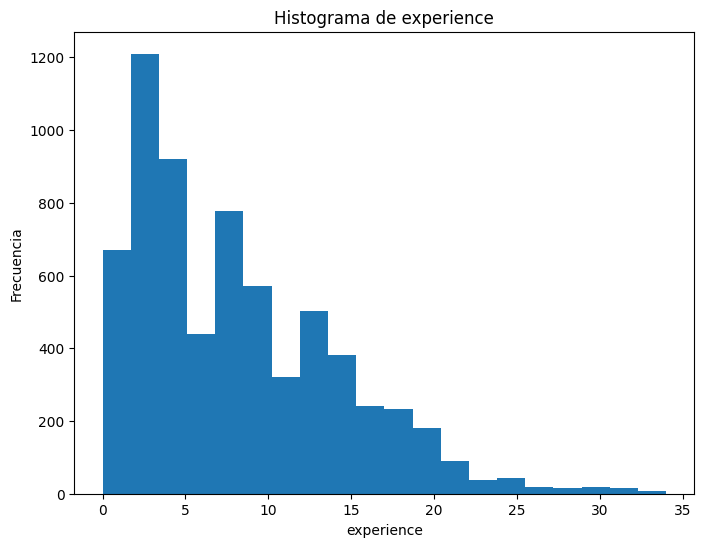

In [282]:
plt.figure(figsize=(8, 6))
plt.hist(df['experience'], bins=20)
plt.xlabel('experience')
plt.ylabel('Frecuencia')
plt.title('Histograma de experience')
plt.show()

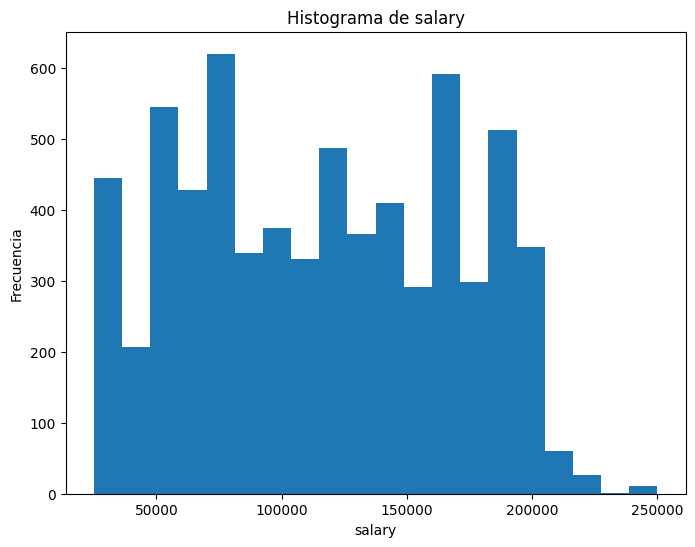

In [283]:
plt.figure(figsize=(8, 6))
plt.hist(df['salary'], bins=20)
plt.xlabel('salary')
plt.ylabel('Frecuencia')
plt.title('Histograma de salary')
plt.show()

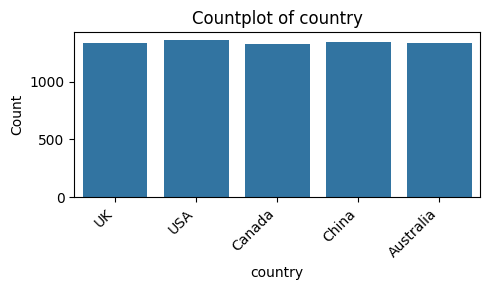

In [284]:
categorical_column = 'country'
plt.figure(figsize=(5, 3))
sns.countplot(x=categorical_column, data=df)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

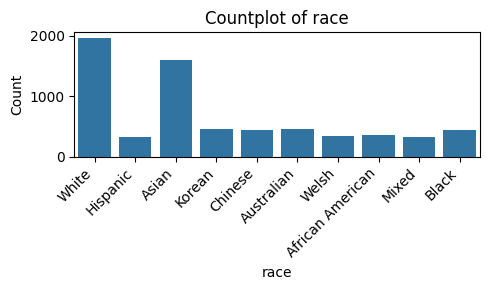

In [285]:
categorical_column = 'race'
plt.figure(figsize=(5, 3))
sns.countplot(x=categorical_column, data=df)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

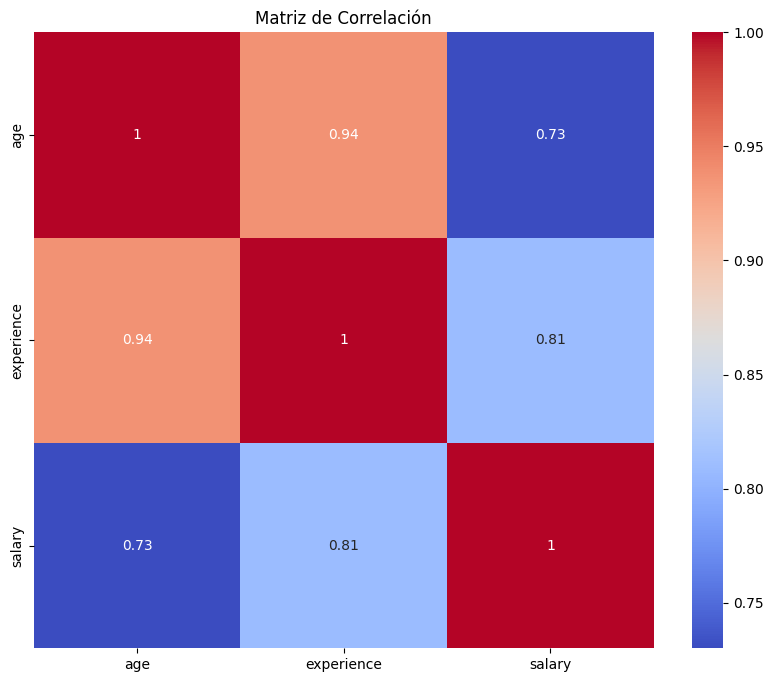

In [286]:
# Matriz de correlación (para variables numéricas)
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Según podíamos esperar, la edad y la experiencia laboral están correladas con el salario, con lo que posteriormente se va a proceder a eliminar dichas columnas.

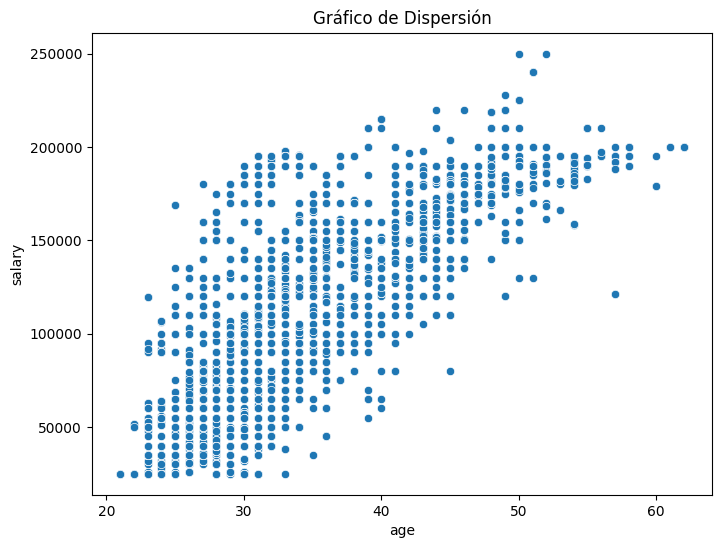

In [287]:
# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='salary', data=df)
plt.xlabel('age')
plt.ylabel('salary')
plt.title('Gráfico de Dispersión')
plt.show()

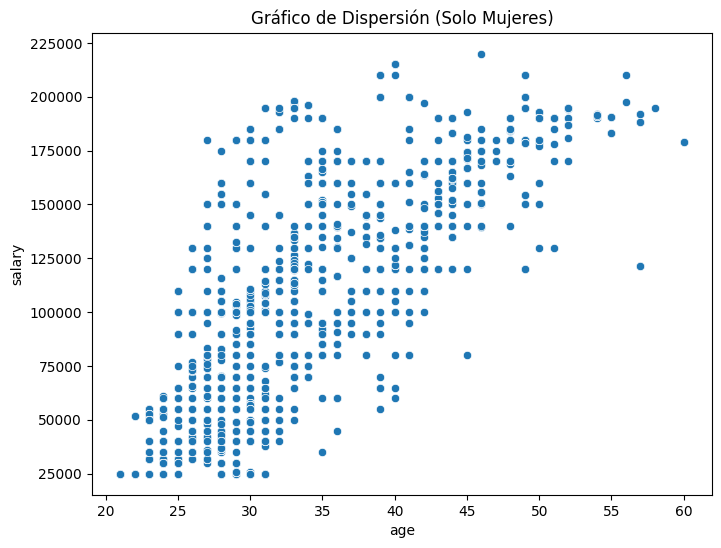

In [288]:
plt.figure(figsize=(8, 6))
female_data = df[df['gender'] == 'Female']
sns.scatterplot(x='age', y='salary', data=female_data)
plt.xlabel('age')
plt.ylabel('salary')
plt.title('Gráfico de Dispersión (Solo Mujeres)')
plt.show()

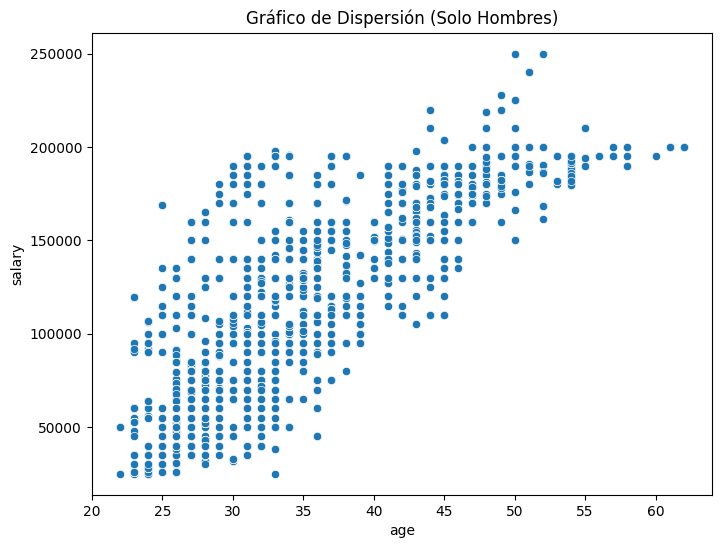

In [289]:
plt.figure(figsize=(8, 6))
male_data = df[df['gender'] == 'Male']
sns.scatterplot(x='age', y='salary', data=male_data)
plt.xlabel('age')
plt.ylabel('salary')
plt.title('Gráfico de Dispersión (Solo Hombres)')
plt.show()

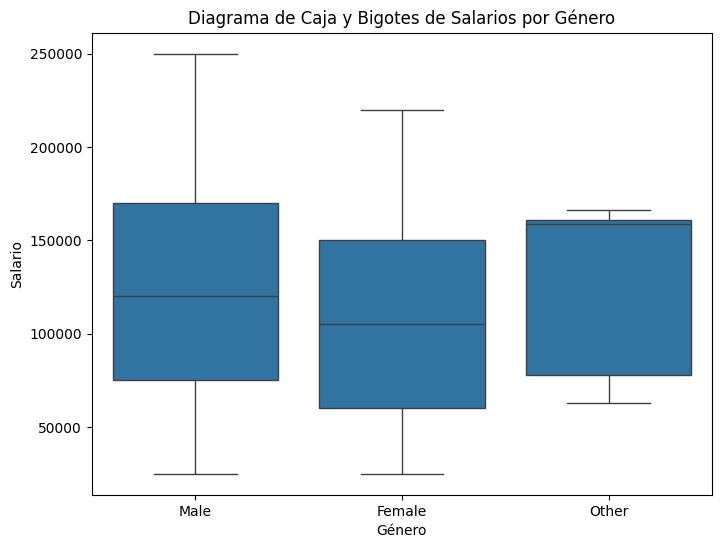

In [290]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='salary', data=df)
plt.xlabel('Género')
plt.ylabel('Salario')
plt.title('Diagrama de Caja y Bigotes de Salarios por Género')
plt.show()

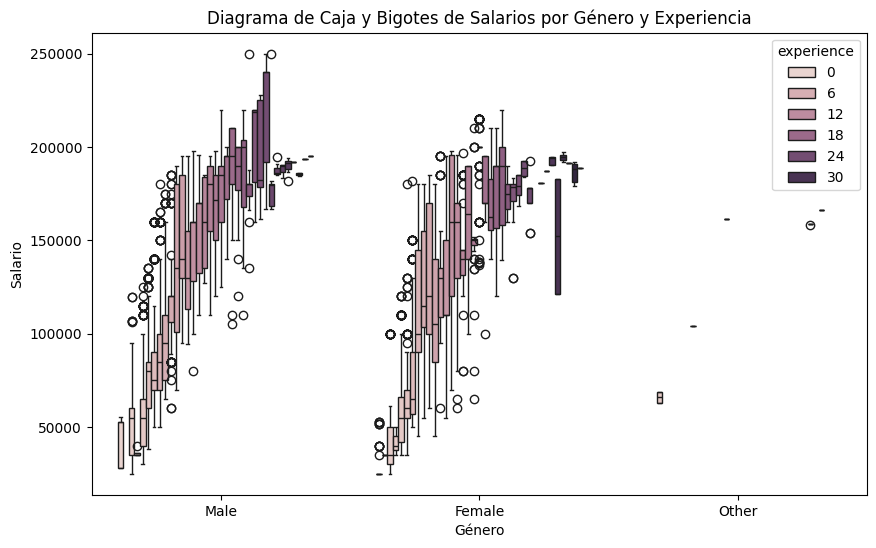

In [291]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='salary', hue='experience', data=df)
plt.xlabel('Género')
plt.ylabel('Salario')
plt.title('Diagrama de Caja y Bigotes de Salarios por Género y Experiencia')
plt.show()

Como se puede observar, existen diferencias en cuanto al salario entre los hombres y las mujeres, con lo que para evitar introducir un sesgo en nuestro modelo se va a eliminar la columna de género.

También se van a revisar los datos por el campo _race_.

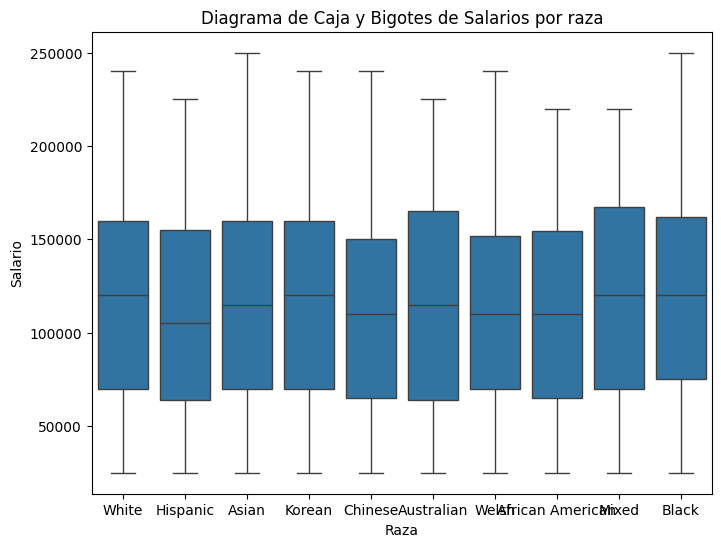

In [292]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='race', y='salary', data=df)
plt.xlabel('Raza')
plt.ylabel('Salario')
plt.title('Diagrama de Caja y Bigotes de Salarios por raza')
plt.show()

En el caso de la columna _race_ también sucede lo mismo, podríamos crear un modelo que discriminara por razas y asignara salarios más bajos por ejemplo a la comunidad hispana, con lo que se procede a eliminar esta columna y se añade la columna experice, que estaba correlada con el salario.

In [293]:
df = df.drop(columns=['gender', 'race','experience'])

In [294]:
df.head()

,age,education,job,salary,country
index,,,,,
0,32.0,Bachelor's,Software Engineer,90000.0,UK
1,28.0,Master's,Data Analyst,65000.0,USA
2,NaN,PhD,Senior Manager,150000.0,Canada
3,36.0,Bachelor's,Sales Associate,60000.0,USA
4,52.0,Master's,Director,200000.0,USA


#2 - Tratamiento de nulos


In [295]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6691 entries, 0 to 6703
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        6131 non-null   float64
 1   education  6690 non-null   object 
 2   job        6691 non-null   object 
 3   salary     6691 non-null   float64
 4   country    6691 non-null   object 
dtypes: float64(2), object(3)
memory usage: 313.6+ KB


Como se puede observar la columna _age_ presenta una gran cantidad de nulos, un 8,3%. Aun así no sería susceptible de ser eliminada pues se perderían muchos datos de otras columnas que sí aportan información.


##2.1 - Imputación de los valores nulos

Para evitar la pérdida de datos útiles se van a rellenar los datos sobre la edad aplicando dos técnicas, una a través de la imputación de los datos, y otras a través de la predicción con una regresión.

##2.1.1 - Imputación
Para ello se ha creado un SimpleInputer y se recuperan los valores de la predicción de la edad.

In [301]:

from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=pd.NA, strategy='mean')
imputacion_df = df.copy()
#Recuperamos el resultado
pred = si.fit_transform(imputacion_df.age.values.reshape(-1, 1))

pred

array([[32.        ],
       [28.        ],
       [33.64459305],
       ...,
       [30.        ],
       [46.        ],
       [26.        ]])

Ahora que se han recuperado los valores se integran en el dataframe.

In [302]:
imputacion_df.age = pred.flatten()

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6691 entries, 0 to 6703
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        6131 non-null   float64
 1   education  6690 non-null   object 
 2   job        6691 non-null   object 
 3   salary     6691 non-null   float64
 4   country    6691 non-null   object 
dtypes: float64(2), object(3)
memory usage: 313.6+ KB
